In [1]:
#!/usr/bin/python
#coding = utf-8
#Author: Selvaria

# 多层感知机

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import random

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）

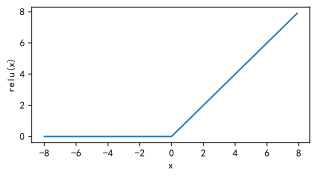

In [3]:
# Relu函数

def xyplot(x_vals, y_vals, name): # 画图函数
    plt.rcParams['figure.figsize'] = (5, 2.5)
    plt.plot(x_vals.numpy(), y_vals.numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')
    
x = tf.Variable(tf.range(-8,8,0.1),dtype=tf.float32)
y = tf.nn.relu(x)
xyplot(x, y, 'relu')

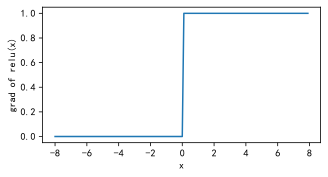

In [4]:
# Relu函数的导数

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.nn.relu(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of relu')

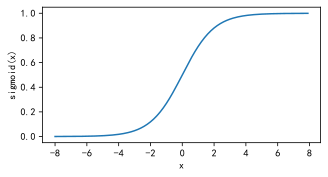

In [5]:
#sigmoid

y = tf.nn.sigmoid(x)
xyplot(x, y, 'sigmoid')

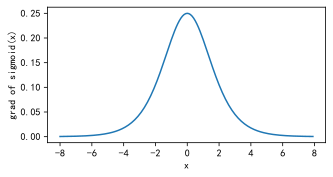

In [6]:
#sigmoid导数
with tf.GradientTape() as t:
    t.watch(x)
    y = tf.nn.sigmoid(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of sigmoid')

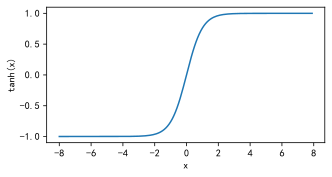

In [7]:
# tanh（双曲正切）函数可以将元素的值变换到-1和1之间：

y = tf.nn.tanh(x)
xyplot(x, y, 'tanh')

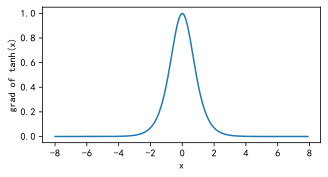

In [8]:
# tanh函数导数

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.nn.tanh(x)
dy_dx = t.gradient(y, x)
xyplot(x, dy_dx, 'grad of tanh')

In [2]:
# 下边是从零开始实现

import tensorflow as tf
import numpy as np
import sys
print(tf.__version__)

2.1.0


In [3]:
# 获取和读取数据

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

batch_size = 256

x_train = tf.cast(x_train, tf.float32)
x_test = tf.cast(x_test, tf.float32)
x_train = x_train/255.0
x_test = x_test/255.0
train_iter = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
test_iter = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)

num_inputs, num_outputs, num_hiddens = 784, 10, 256 # 中间隐藏层的单元数量是256个

w1 = tf.Variable(tf.random.truncated_normal([num_inputs, num_hiddens], stddev=0.1))
b1 = tf.Variable(tf.random.truncated_normal([num_hiddens], stddev=0.1))
w2 = tf.Variable(tf.random.truncated_normal([num_hiddens, num_outputs], stddev=0.1))
b2=tf.Variable(tf.random.truncated_normal([num_outputs], stddev=0.1))

In [4]:
# relu函数，也可以用tf.nn.relu(x)

def relu(x):
    return tf.math.maximum(x,0)

# 3.9.4 定义模型
def net(x,w1,b1,w2,b2):
    x = tf.reshape(x,shape=[-1,num_inputs])
    h = relu(tf.matmul(x,w1) + b1 )
    y = tf.math.softmax( tf.matmul(h,w2) + b2 )
    return y

# 3.9.5 定义损失函数
def loss(y_hat,y_true):
    return tf.losses.sparse_categorical_crossentropy(y_true,y_hat)

In [5]:
# 3.9.6 训练模型

def acc(y_hat,y):
    return np.mean((tf.argmax(y_hat,axis=1) == y))

num_epochs, lr = 5, 0.5

for epoch in range(num_epochs):
    loss_all = 0
    for x,y in train_iter:
        with tf.GradientTape() as tape:
            y_hat = net(x,w1,b1,w2,b2)
            l = tf.reduce_mean(loss(y_hat,y))
            loss_all += l.numpy()
            grads = tape.gradient(l, [w1, b1, w2, b2])
            w1.assign_sub(grads[0])
            b1.assign_sub(grads[1])
            w2.assign_sub(grads[2])
            b2.assign_sub(grads[3])
    print(epoch, 'loss:', l.numpy())
    total_correct, total_number = 0, 0

    for x,y in test_iter:
        with tf.GradientTape() as tape:
            y_hat = net(x,w1,b1,w2,b2)
            y=tf.cast(y,'int64')
            correct=acc(y_hat,y)
    print(epoch,"test_acc:", correct)

0 loss: 1.4302658
0 test_acc: 0.5
1 loss: 0.963737
1 test_acc: 0.8125
2 loss: 1.7346922
2 test_acc: 0.5
3 loss: 1.7344328
3 test_acc: 0.5
4 loss: 1.8590913
4 test_acc: 0.3125


In [10]:
# 以下是简洁实现

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# 训练
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.5),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5,
              batch_size=256,
              validation_data=(x_test, y_test),
             validation_freq=2) #这个参数的意思是每跑几个批次进行一次验证

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.7139 - accuracy: 0.7426
Epoch 2/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.4725 - accuracy: 0.8242 - val_loss: 0.5845 - val_accuracy: 0.7768
Epoch 3/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.4106 - accuracy: 0.8477
Epoch 4/5
60000/60000 [==============================] - 1s 10us/sample - loss: 0.3814 - accuracy: 0.8582 - val_loss: 0.4151 - val_accuracy: 0.8453
Epoch 5/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3616 - accuracy: 0.8654
